

# ***Livrable 1 : la modélisation du projet***
#### Mohamed.O, Ethan.D, Samy.H, Hugo.L

### **Introduction** :

Le problème à résoudre un problème d'itinéraire fixé dans lequel une voiture part d'un point de départ, visite chaque ville une seule fois, et revient à son point de départ tout en respectant les fenêtres du temps pour chaque villes.

Dans ce livrable, nous présentons le premier travail réalisé en collaboration par les membres de notre équipe.

- Quel est le type de notre problème et la contrainte choisie ?
- Pourquoi est-il particulièrement difficile à résoudre ?
- Quelles est notre programme linéaire?

# 1-**Le problème** :

L'objectif de notre projet est de déterminer le chemin le plus court pour un véhicule qui doit visiter une liste donnée de villes, passer par chacune une seule fois, et retourner à son point de départ initial. 
Chaque ville doit être visitée dans un intervalle de temps prédéfini, appelé fenêtre de temps. Alors, notre problème est de type **voyageur du commerce avec fenêtre de temps(TSP-TW)**

# 2-**TSP-TW est NP-Complet** :


#### Problème des tournées de livraisons chez CESI (PTLC) avec fenêtres de temps et contraintes supplémentaires
Données :

- Un graphe G=(U,E), où U est un ensemble de sommets représentant des points de livraison c'est-à-dire les clients, et E est un ensemble d'arêtes pondérées représentant le coût distance/temps associé à chaque chemins.

- On a t représentant la fenetre de temps que les camions doivent respecter.


---

**Question :**
- Existe-t-il un circuit avec un ensemble de tournées qui passent par l'ensemble des sommets de \( G \) en respectant les fenêtres de temps pour chaque point de livraison ?

## 1. **Appartenance du TSP-TW à NP** :

### 1 - Description:

La solution de ce probleme est une tournée débutant par un point noté V1 en vistant chaque ville, avec des moments précis dans le temps.

### 2 - Verifier en temps polynomial


* Le livreur doit ainsi visiter l'ensemble de ville noté v alors (v1,v2, jusqu'a vn). Pour vérifier qu'il soit bien en temps polynomial, il faut parcourir la liste et "cocher" chaque point qui est visité, cela donne une une complexité de ***O(n)***

* Nous devons vérifier que la ville de départ *v1* est bien la ville de fin, pour cela on regarde la premiere et la derniere ville visité. Alors on a une complexité de ***O(1)***

* Et pour finir, nous devons vérifier le temps de trajet. Nous avons un temps moyen pour faire le trajet, cependant il existe des contraintes qui peuvent faire varier le temps de trajet comme le trafic.
Donc Pour chaque ville avec Vi et Vi+1 qui sont relié par une arréte, et en additionnant chaque arréte, le calcul peut etre fait en temps polynomial, ce qui donne une complixité de ***O(n)***




---




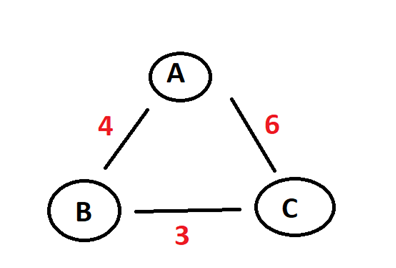

## **2. Appartenance du TSP-TW à NP-difficile : réduction polynomiale** :

### Étape 1 : Instance du TSP classique
Prenons une instance simple du TSP avec trois villes : A, B, C. Les distances (ou durées) de trajet entre les villes sont données dans le tableau ci-dessous. Nous avons une limite de durée L = 13 minutes pour le circuit complet.


### Étape 2 : Solution optimale du TSP classique

Pour notre instance du TSP, un chemin optimal est A → B → C → A, avec une durée totale de :

                        T(A→B)+T(B→C)+T(C→A)=4+3+6=13 minutes

Ce chemin est une solution valide pour le TSP classique car sa durée totale respecte la limite L = 13mins

### Étape 3 : Transformation en TSP-TW (fenêtres de temps) :
Pour transformer ce problème en une instance de TSP avec fenêtres de temps (TSP-TW), ajoutons une fenêtre de temps pour chaque ville. Ces fenêtres de temps définissent les intervalles pendant lesquels chaque ville doit être visitée. Supposons les fenêtres suivantes :

                A : [0,7]
                B : [2,10]
                C : [5,13]



Ces fenêtres imposent une contrainte supplémentaire : non seulement le chemin doit respecter une durée totale, mais il doit aussi atteindre chaque ville dans l'intervalle de temps autorisé.

### Étape 4 : Vérification de la solution pour le TSP-TW
Prenons le chemin A→B→C→A avec une durée totale de 13 minutes. Examinons si ce chemin respecte les fenêtres de temps :

        A → B : Départ de A à t=0, arrivée à B à t=4 (dans [2, 10] donc valide).

        B → C : Départ de B à t=4, arrivée à C à t=7 (dans [5, 13] donc valide).

        C → A : Départ de C à t=7, arrivée à A à t=13 (dans [0, 7], mais ici la fenêtre est dépassée)

Ce parcours échoue donc à satisfaire la fenêtre de temps pour le retour à A. Nous avons donc une contrainte qui rend ce problème plus complexe que le TSP classique, car les fenêtres de temps restreignent les solutions possibles.

Relation de difficulté entre TSP et TSP-TW
En ajoutant les fenêtres de temps, le problème devient au moins aussi difficile que le TSP ( un problème déjà connu comme NP-Complet). Si on pouvait résoudre efficacement le TSP-TW, alors on pourrait aussi résoudre le TSP en utilisant cette méthode, en ajoutant des fenêtres de temps suffisamment larges pour que toute visite soit acceptable dans ces plages.

Puisque résoudre le TSP est au moins aussi complexe que résoudre le TSP-TW (ce dernier ajoute une contrainte de fenêtres de temps mais ne simplifie en aucun cas le problème), alors le TSP-TW est NP-difficile.

## **Conclusion** :

Puisque notre problème appartient à NP et NP-difficile. Donc, notre problème est NP-complet


# 3-**La programmation linéaire** :


Passons maintenant à la programmation linéaire, nous allons utiliser un solveur nommé pulp pour résoudre le TSP-Tw pour notre tournée de livraison avec fenetres de temps. Nous prenons une modélisation d'une taille entre 5 et 40 villes pour un résultat rapide et efficace même si pouvons allez sur des plus grandes valeurs, sauf que ceci prendra plus de temps.
La programmation linéaire est utilisé ici pour obtenir la solution la plus optimale possible.

Résumons notre problème :

- Chaque client doit être visité une seule fois.
- Chaque client doit être visité dans une fenêtre temporelle spécifiée.
- Le camion commence et finit sa tournée au dépôt.


### Les variables de décision:
- ***X*_ij**, valeur binaire pour indiquer le chemin de i à j si il est utiliser.
- ***U*_i**, valeur entière pour éviter les sous tours.
- ***t***, valeur permettant de vérifier les fenêtres temporelles.

### La fonction objectif:
$$
\text{Minimize} \quad \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} t_{i,j} \cdot x_{i,j}
$$
Car on veut ici minimiser le temps parcouru pour notre camion.
​


### Nos contraintes:

- Visite unique de chaque point : Chaque point est visité exactement une fois. Pour respecté le principe du TSP-TW.
$$
   \sum_{j=0}^{n-1} x_{i,j} = 1, \quad \forall i \in \{0, 1, \dots, n-1\}
   
   \sum_{i=0}^{n-1} x_{i,j} = 1, \quad \forall j \in \{0, 1, \dots, n-1\}
   $$

- Pas de boucle sur un point lui-même, donc eviter les sous-tours.
$$x_{i,i} = 0, \quad \forall i \in \{0, 1, \dots, n-1\}$$
- Début et fin de la tournée au dépot. Donc :
$$
   \sum_{j=1}^{n-1} x_{0,j} = 1
   
   \sum_{i=1}^{n-1} x_{i,0} = 1
   $$
- Fenêtres de temps, le camion doit respecter que chaque point est livrer dans la fenetre autorisé, donc :
$$a_i \leq t_i \leq f_i$$


C'est ici n-1 car dans le code on utilisera la range du nombre de points donc *n-1*

### Importation bibliothéque

In [3]:
import pulp
import random
import time

### Fonction pour créer et attribuer valeur graphe

In [4]:
class Graphe:
    def __init__(self):
        return
    
    def creasommet(self,nbr, distance_max):
        random.seed(3)
        distances = [[0 if i == j else None for j in range(nbr)] for i in range(nbr)]

        for i in range(nbr):
            for j in range(i + 1, nbr):
                distance = random.randint(1, distance_max)
                distances[i][j] = distance
                distances[j][i] = distance

        dicodist = {i:distances[i] for i in range(nbr)}

        return dicodist
    def creawindow(self,distance,duree_min,duree_max):
    
        debut = int(distance)
        duree = random.randint(duree_min, duree_max)
        fin = debut + duree
        return (debut, fin)


### Déclaration variable

In [1]:
nbr =10 #nombre de sommets
distance_max=nbr*3 #distance max entre chaque point

#temps autorisé pour chaque livraison
duree_min=5
duree_max=20


### Appel des fonctions pour générer le graphe

In [5]:
graphe = Graphe()
start = time.process_time()
distances = graphe.creasommet(nbr, distance_max)
stop = time.process_time()
duree = (stop-start)
print("la durée est:",duree)
print("Le dictionnaire a bien été généré.")
fenetres = [[(0, 0) for _ in range(nbr)] for _ in range(nbr)]

start = time.process_time()
for i in range(nbr):
    for j in range(i + 1, nbr):
        distance_ij = distances[i][j]
        fenetre_ij = graphe.creawindow(distance_ij, duree_min, duree_max)
        #assigne (x,y) dans les deux coté
        fenetres[i][j] = fenetre_ij
        fenetres[j][i] = fenetre_ij
stop = time.process_time()
duree = (stop-start)
print("la durée est:",duree)
print("Les fenêtres de temps ont bien été attribué.")

la durée est: 0.0
Le dictionnaire a bien été généré.
la durée est: 0.0
Les fenêtres de temps ont bien été attribué.


### Verifier la création des graphes

In [6]:
distances

{0: [0, 8, 19, 18, 5, 12, 30, 20, 16, 21],
 1: [8, 0, 19, 3, 20, 1, 30, 27, 16, 9],
 2: [19, 19, 0, 18, 8, 7, 23, 16, 18, 27],
 3: [18, 3, 18, 0, 18, 16, 13, 21, 28, 5],
 4: [5, 20, 8, 18, 0, 8, 21, 5, 28, 30],
 5: [12, 1, 7, 16, 8, 0, 17, 13, 24, 1],
 6: [30, 30, 23, 13, 21, 17, 0, 22, 25, 3],
 7: [20, 27, 16, 21, 5, 13, 22, 0, 6, 25],
 8: [16, 16, 18, 28, 28, 24, 25, 6, 0, 19],
 9: [21, 9, 27, 5, 30, 1, 3, 25, 19, 0]}

In [19]:
fenetres

[[(0, 0),
  (20, 35),
  (11, 16),
  (7, 15),
  (19, 35),
  (25, 32),
  (18, 23),
  (3, 10),
  (21, 30),
  (1, 15),
  (17, 24),
  (12, 20),
  (19, 34),
  (19, 28),
  (12, 25),
  (20, 36),
  (11, 30),
  (1, 6),
  (5, 14),
  (22, 34)],
 [(20, 35),
  (0, 0),
  (13, 33),
  (25, 33),
  (23, 36),
  (9, 20),
  (8, 25),
  (22, 41),
  (13, 19),
  (24, 29),
  (12, 29),
  (13, 23),
  (7, 26),
  (22, 41),
  (22, 41),
  (23, 28),
  (19, 37),
  (7, 20),
  (23, 29),
  (10, 19)],
 [(11, 16),
  (13, 33),
  (0, 0),
  (4, 14),
  (2, 14),
  (2, 13),
  (24, 41),
  (14, 32),
  (22, 28),
  (10, 22),
  (6, 14),
  (14, 28),
  (5, 21),
  (19, 33),
  (12, 19),
  (19, 29),
  (10, 29),
  (3, 13),
  (4, 13),
  (4, 15)],
 [(7, 15),
  (25, 33),
  (4, 14),
  (0, 0),
  (1, 13),
  (9, 16),
  (7, 27),
  (12, 23),
  (16, 32),
  (16, 32),
  (16, 27),
  (11, 18),
  (9, 21),
  (17, 30),
  (10, 15),
  (21, 40),
  (18, 33),
  (7, 23),
  (23, 29),
  (8, 21)],
 [(19, 35),
  (23, 36),
  (2, 14),
  (1, 13),
  (0, 0),
  (4, 19),
  (

### Calcul TSPTW

In [33]:
n_point = len(distances)  


#Minimisation du TSP-TW
problem = pulp.LpProblem('tsptw', pulp.LpMinimize)

# Preparez les variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')
t = pulp.LpVariable.dicts("t", range(n_point), lowBound=0, cat="Continuous")

# Preparez l'objectif
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# Def des contraintes
#demarre à 0
for i in range(n_point):
    problem += x[i, i] == 0  
    
#Verifie les fenetres de temps
for i in range(n_point):
    ai, fi = fenetres[i][j]
    problem += t[i] >= ai  
    problem += t[i] <= fi  

#Permet de verifier que chaque sommet est visité qu'une seule fois
for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1 
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1  

#Fixe le depart et l'arrivé au point 0, donc commence et finit sa tournée à 0 qui est le dépot
problem += pulp.lpSum(x[0, j] for j in range(1, n_point)) == 1
problem += pulp.lpSum(x[i, 0] for i in range(1, n_point)) == 1

# Eliminé les sous tour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1
            
# Resolution du probleme
status = problem.solve()

#Affiche resultat
print("Status:", pulp.LpStatus[status])
print("Objective value (total distance):", pulp.value(problem.objective))

Status: Optimal
Objective value (total distance): 440.0


### Affiche le chemin parcouru

In [8]:
chemin = []
ville = 0  

while len(chemin) < n_point:
    for j in range(n_point):
        if x[ville, j].varValue == 1:
            ville = j
            chemin.append(ville)
            break

print("Chemin:", [0]+chemin)  

Chemin: [0, 4, 7, 8, 2, 5, 9, 6, 3, 1, 0]


Après la résolution de ce problème, on voit que le solveur est très puissant mais quand il y'aura un trop grand nombre de sommets. Il faut donc partir sur une méta-heuristique, qui sera fait lors du prochain livrable étant donné que le temps pour par exemple 1000 points serait beaucoup trop long. On peut dire que la borne inférieur avant l'utilisation de la méta heuristique est de 50 villes qui semble est résolu avec un temps raisonable étant donnée que le programme se ressout de façon exponentielle.